In [1]:
import re
import nltk
import pandas as pd
import seaborn as sns

In [2]:
# pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', -1)

/home/ashu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [3]:
tweets = pd.read_csv("tweets.csv")


In [4]:
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [6]:
len(tweets)

31962

In [7]:
tweets['label'].value_counts()

0    29720
1    2242 
Name: label, dtype: int64

In [8]:
# 0 non hate
# 1 hate speech

In [9]:
tweets.tweet.nunique()

29530

# Data cleaning and preprocessing

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

In [11]:
# cleaning training datset

for i in range(len(tweets)):
    review = re.sub('[^a-zA-Z]',' ',tweets['tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'user cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around

In [13]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000)

X = cv.fit_transform(corpus).toarray()


In [14]:
X.shape


(31962, 7000)

In [15]:
# y=pd.get_dummies(tweets['label'])

In [16]:
# y.head()

In [17]:
# Y = y.iloc[:,1].values

In [18]:
Y = tweets['label'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
#Training model using Naive bayes classifier 
#its a classification technique which works completely on probability
from sklearn.naive_bayes import MultinomialNB
#MultinomialNB works for multiple classes ,two classes any number of classes you want
hatespeech_detect_model = MultinomialNB().fit(X_train,y_train)


In [25]:
y_pred = hatespeech_detect_model.predict(X_test)

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)

In [27]:
print(confusion_m)

[[5755  230]
 [ 128  280]]


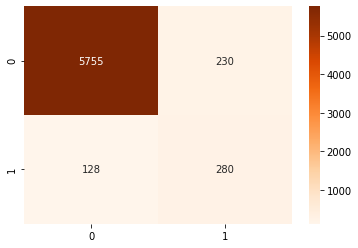

In [28]:
sns.heatmap(confusion_m,annot=True,fmt='g', cmap='Oranges')

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [30]:
print("Accuracy is {0:.2f}%".format(accuracy))

Accuracy is 0.94%


In [31]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
score = accuracy_score(y_test,y_pred)
print("Accuracy is {0:.2f}%".format(score))
report = classification_report(y_test,y_pred)
print(report)

[[5755  230]
 [ 128  280]]
Accuracy is 0.94%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5985
           1       0.55      0.69      0.61       408

    accuracy                           0.94      6393
   macro avg       0.76      0.82      0.79      6393
weighted avg       0.95      0.94      0.95      6393



In [32]:
from sklearn.ensemble import RandomForestClassifier
#implement RandomForest Classifier
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
from sklearn.ensemble import RandomForestClassifier
#implement RandomForest Classifier
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
predictions = randomclassifier.predict(X_test)

In [38]:
score = accuracy_score(y_test,predictions)
print("Accuracy is {0:.2f}%".format(score))

Accuracy is 0.96%


In [35]:
matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print("Accuracy is {0:.2f}%".format(score))
report = classification_report(y_test,predictions)
print(report)

[[5941   44]
 [ 198  210]]
Accuracy is 0.96%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.83      0.51      0.63       408

    accuracy                           0.96      6393
   macro avg       0.90      0.75      0.81      6393
weighted avg       0.96      0.96      0.96      6393



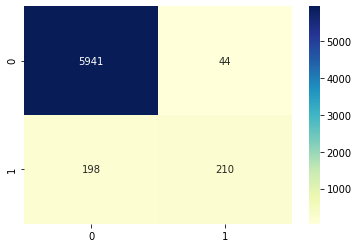

In [36]:
sns.heatmap(matrix,annot=True,fmt='g', cmap='YlGnBu')

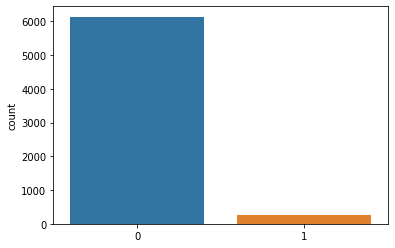

In [37]:
sns.countplot(predictions)